
# Teorema del Límite Central en Python

Simulamos el comportamiento del teorema del límite central a partir de varias distribuciones sesgadas (exponencial, gamma, Poisson, chi-cuadrado, uniforme y binomial). Para cada distribución construiremos:

1. Un histograma de la población simulada donde el título muestra su densidad o función de masa analítica.
2. Histogramas de los promedios muestrales para tamaños de muestra crecientes, comparándolos con la distribución normal teórica.

Todas las simulaciones usan el mismo `seed` para garantizar reproducibilidad.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.titlesize": 15,
    "axes.titlepad": 12,
    "axes.labelsize": 12,
    "axes.formatter.use_mathtext": True
})


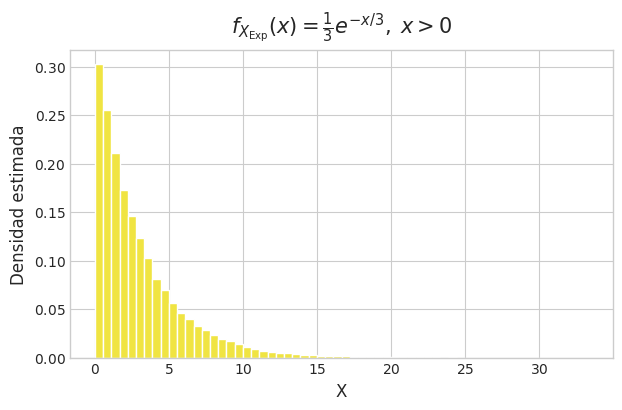

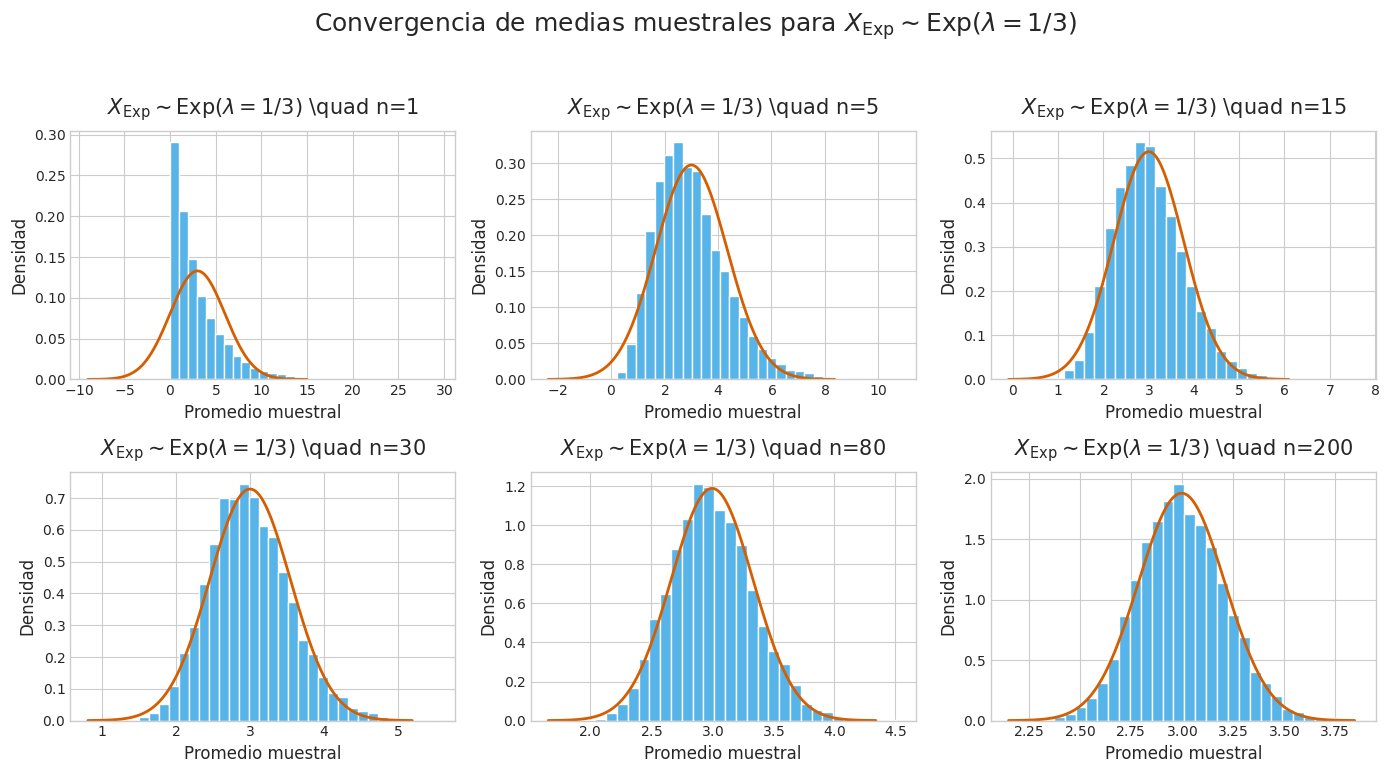

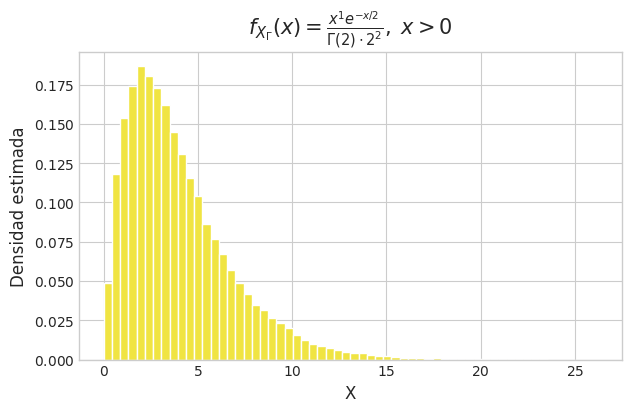

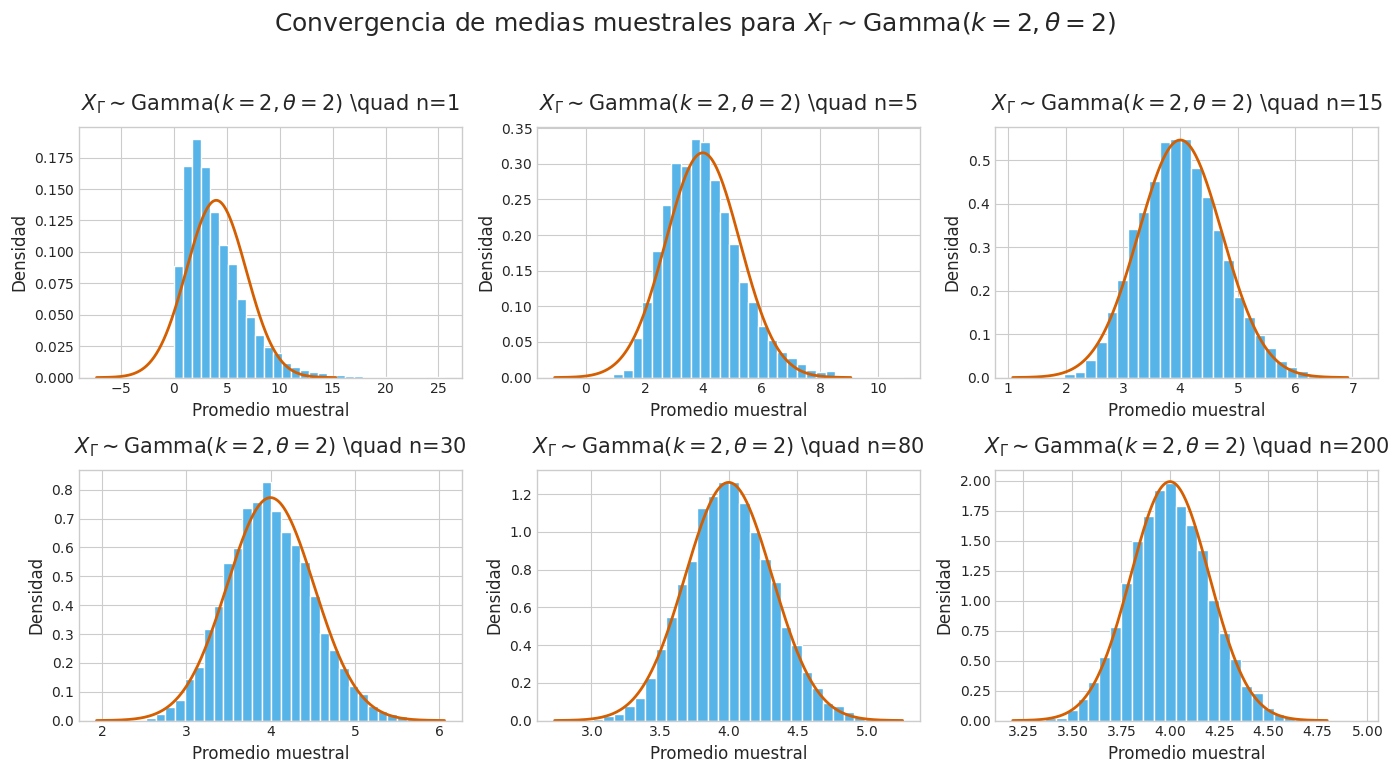

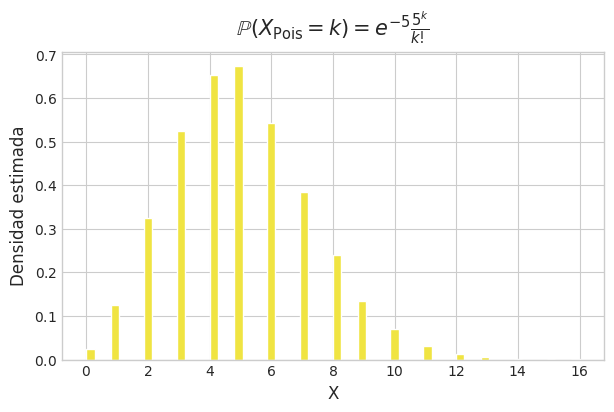

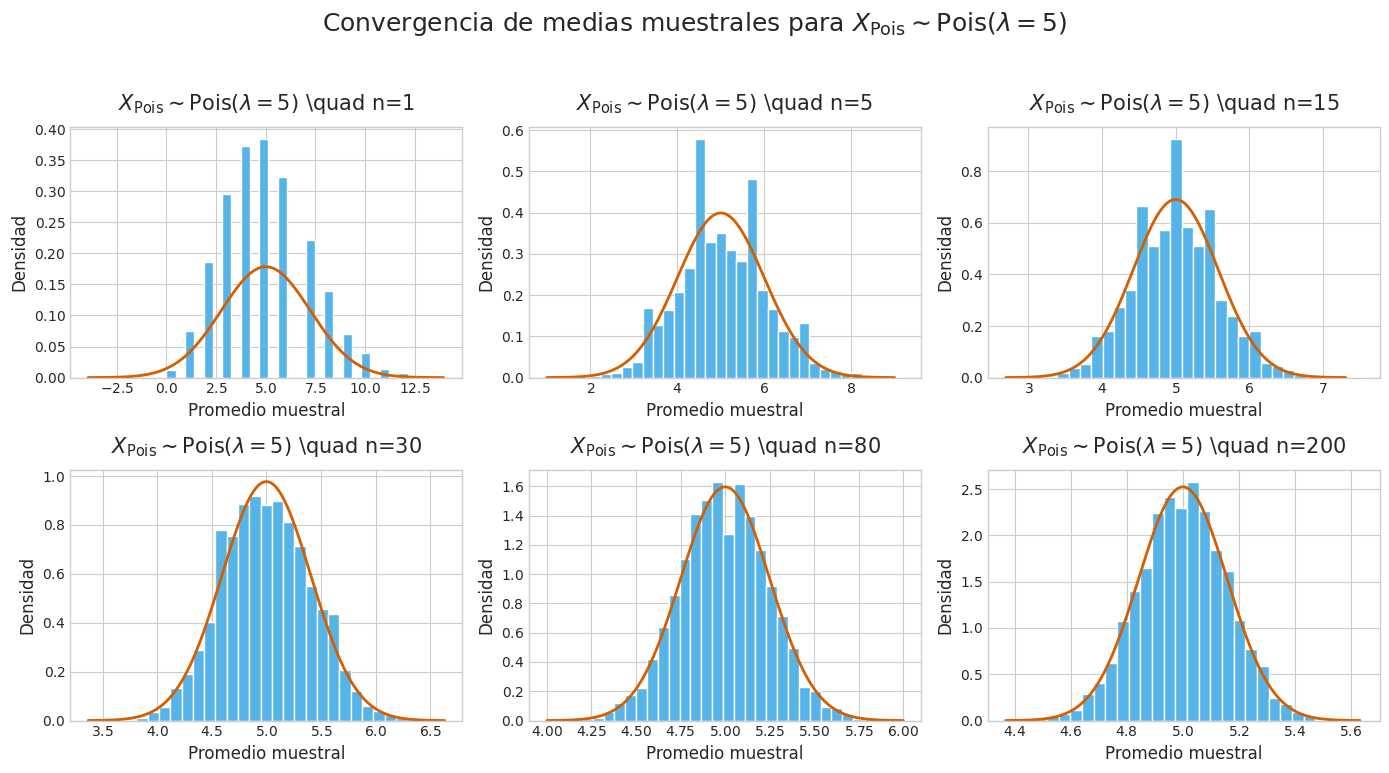

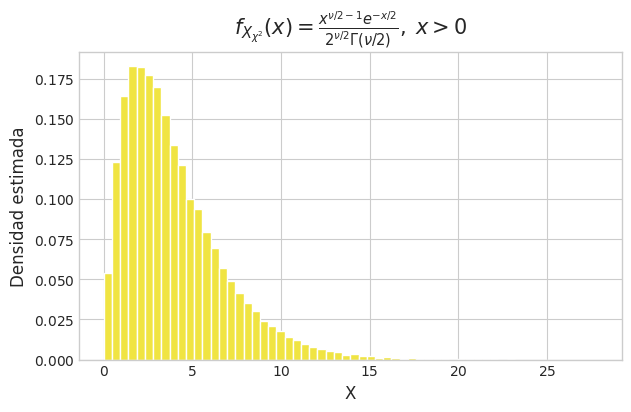

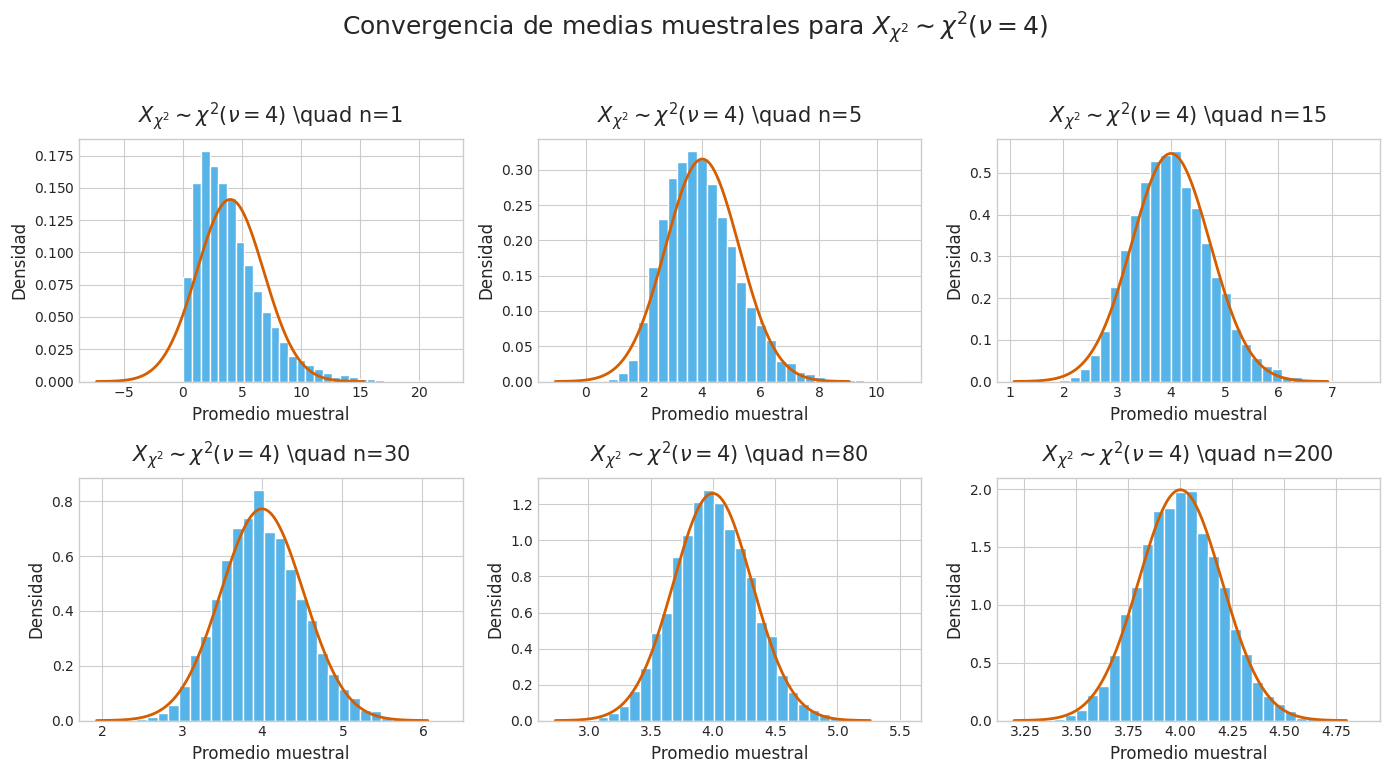

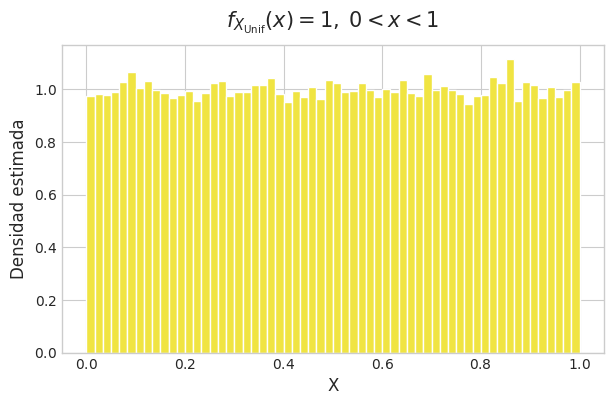

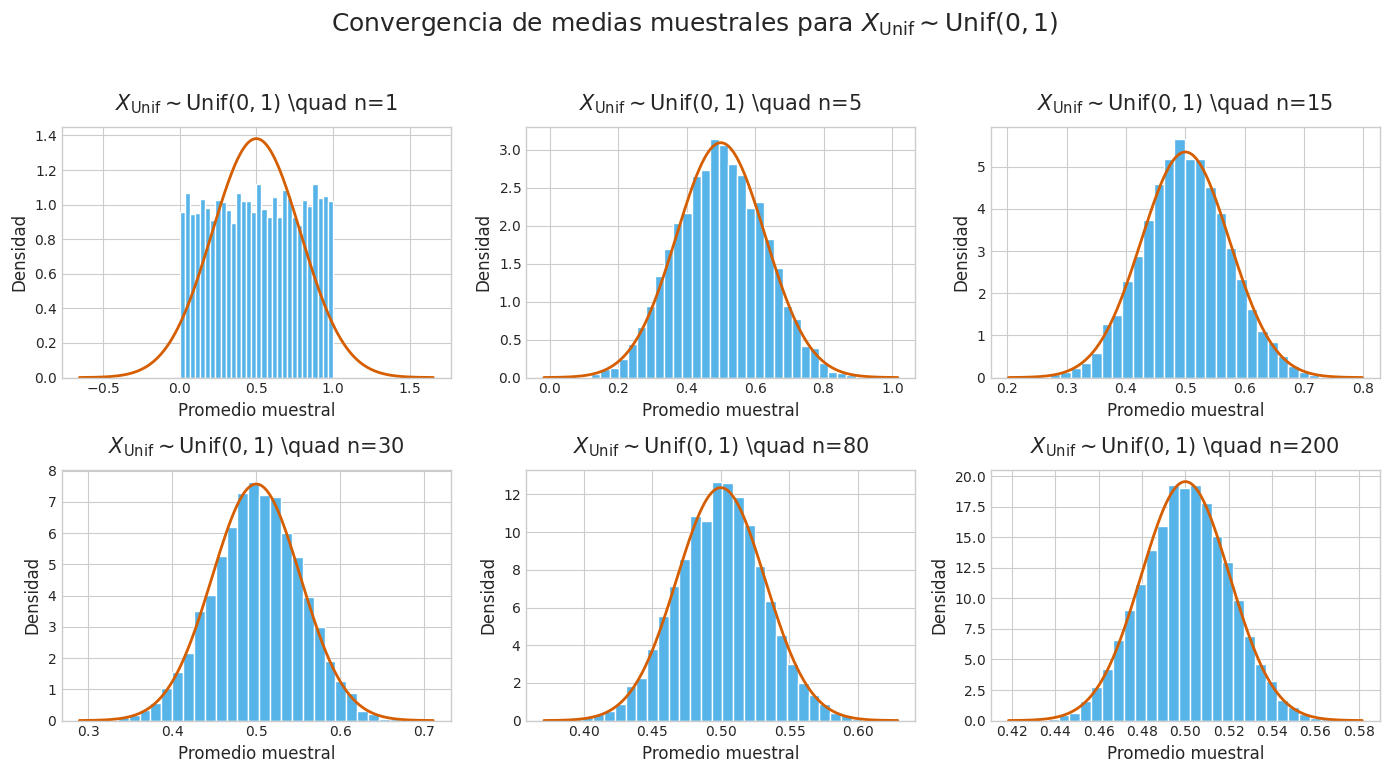

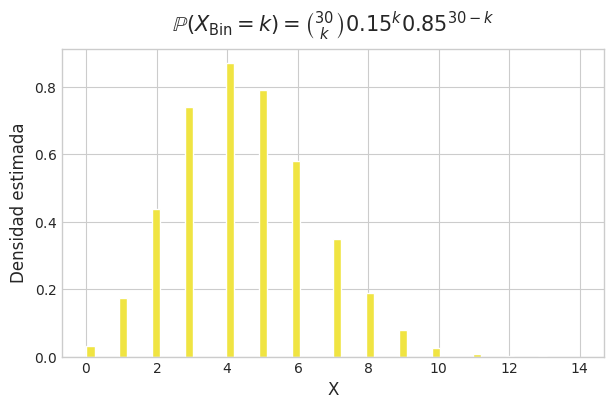

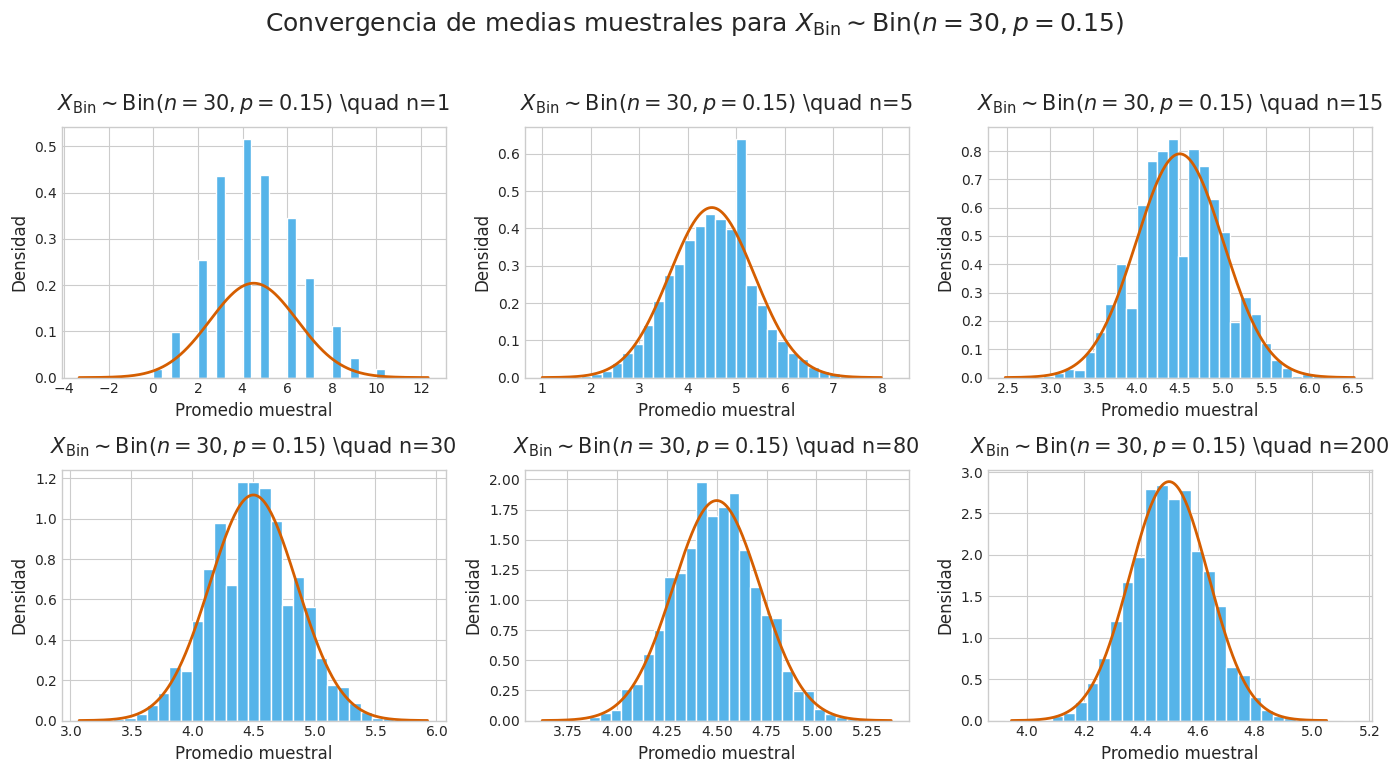

In [2]:

rng = np.random.default_rng(2024)
sample_sizes = [1, 5, 15, 30, 80, 200]
simulations = 8000
population_draws = 60000

def normal_pdf(x, mean, std):
    coef = 1.0 / (std * np.sqrt(2 * np.pi))
    return coef * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Generadores y parámetros teóricos para cada distribución sesgada
# Se definen como lambdas que aceptan "size" para mantener el código DRY.
distributions = [
    {
        "name": r"$X_{\mathrm{Exp}} \sim \mathrm{Exp}(\lambda=1/3)$",
        "density_title": r"$f_{X_{\mathrm{Exp}}}(x)=\frac{1}{3}e^{-x/3},\; x>0$",
        "generator": lambda size, rng=rng: rng.exponential(scale=3, size=size),
        "mean": 3.0,
        "sd": 3.0,
    },
    {
        "name": r"$X_{\Gamma} \sim \mathrm{Gamma}(k=2,\theta=2)$",
        "density_title": r"$f_{X_{\Gamma}}(x)=\frac{x^{1}e^{-x/2}}{\Gamma(2)\cdot 2^{2}},\; x>0$",
        "generator": lambda size, rng=rng: rng.gamma(shape=2.0, scale=2.0, size=size),
        "mean": 4.0,
        "sd": np.sqrt(8.0),
    },
    {
        "name": r"$X_{\mathrm{Pois}} \sim \mathrm{Pois}(\lambda=5)$",
        "density_title": r"$\mathbb{P}(X_{\mathrm{Pois}}=k)=e^{-5}\frac{5^{k}}{k!}$",
        "generator": lambda size, rng=rng: rng.poisson(lam=5.0, size=size),
        "mean": 5.0,
        "sd": np.sqrt(5.0),
    },
    {
        "name": r"$X_{\chi^{2}} \sim \chi^{2}(\nu=4)$",
        "density_title": r"$f_{X_{\chi^{2}}}(x)=\frac{x^{\nu/2-1}e^{-x/2}}{2^{\nu/2}\Gamma(\nu/2)},\; x>0$",
        "generator": lambda size, rng=rng: rng.chisquare(df=4.0, size=size),
        "mean": 4.0,
        "sd": np.sqrt(8.0),
    },
    {
        "name": r"$X_{\mathrm{Unif}} \sim \mathrm{Unif}(0,1)$",
        "density_title": r"$f_{X_{\mathrm{Unif}}}(x)=1,\; 0<x<1$",
        "generator": lambda size, rng=rng: rng.uniform(low=0.0, high=1.0, size=size),
        "mean": 0.5,
        "sd": np.sqrt(1.0 / 12.0),
    },
    {
        "name": r"$X_{\mathrm{Bin}} \sim \mathrm{Bin}(n=30,p=0.15)$",
        "density_title": r"$\mathbb{P}(X_{\mathrm{Bin}}=k)=\binom{30}{k}0.15^{k}0.85^{30-k}$",
        "generator": lambda size, rng=rng: rng.binomial(n=30, p=0.15, size=size),
        "mean": 30 * 0.15,
        "sd": np.sqrt(30 * 0.15 * (1 - 0.15)),
    },
]

for dist in distributions:
    generator = dist["generator"]
    mu = dist["mean"]
    sigma = dist["sd"]

    population = generator(population_draws)
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.hist(population, bins=60, density=True, color="#F0E442", edgecolor="white")
    ax.set_title(dist["density_title"])
    ax.set_xlabel("X")
    ax.set_ylabel("Densidad estimada")
    plt.show()

    fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    axes = axes.ravel()
    for ax, n in zip(axes, sample_sizes):
        samples = generator((simulations, n))
        sample_means = samples.mean(axis=1)
        ax.hist(sample_means, bins=30, density=True, color="#56B4E9", edgecolor="white")
        std_mean = sigma / np.sqrt(n)
        x_vals = np.linspace(mu - 4 * std_mean, mu + 4 * std_mean, 400)
        ax.plot(x_vals, normal_pdf(x_vals, mu, std_mean), color="#D55E00", linewidth=2)
        ax.set_title(rf"n={n}")
        ax.set_xlabel("Promedio muestral")
        ax.set_ylabel("Densidad")

    fig.suptitle(rf"Convergencia de medias muestrales para {dist['name']}", fontsize=18)
    fig.tight_layout(rect=[0, 0.02, 1, 0.95])
    plt.show()
